# **Omdena TrashOut - Task1.1 Cities and Population**

*by Simone Vaccari*




# Set-up

In [5]:
import geemap

ModuleNotFoundError: No module named 'geemap'

# Read Population CSV Data

In [4]:
import pandas as pd
import os
import geemap

ModuleNotFoundError: No module named 'geemap'

In [7]:
!pip install geopandas

  Using cached https://files.pythonhosted.org/packages/f8/dd/c0a6429cc7692efd5c99420c9df525c40f472b50705871a770449027e244/geopandas-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b8/0b/e5b073f74d8c752e85d11769572f8af134d1d3c9234a8fae0a7c0d1e224a/Shapely-1.7.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/6d/42/f4a7cac53b28fa70e9a93d0e89a24d33e14826dad6644b699362ad84dde0/Fiona-1.8.13.post1.tar.gz


    ERROR: Command errored out with exit status 1:
     command: 'C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SIMONE~1\\AppData\\Local\\Temp\\pip-install-6u8jd9o5\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\SIMONE~1\\AppData\\Local\\Temp\\pip-install-6u8jd9o5\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\SIMONE~1\AppData\Local\Temp\pip-install-6u8jd9o5\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [4]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

ModuleNotFoundError: No module named 'shapely'

## Population Density

### Point File

In [5]:
density = pd.read_csv('/content/drive/My Drive/Omdena/Official folder for Trashout/Task_1/T1_Datasets/Cities/density_data_filtered.csv', error_bad_lines=False, sep=',')

# this is just to check that "longitude" and "latitude" are uploaded correctly as floats (without miss-alignments between data records...)
geometry = [Point(xy) for xy in zip(density['x'], density['y'])]
#print(geometry)

print(density.shape)
density.head()
density.info()

(748476, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748476 entries, 0 to 748475
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  748476 non-null  int64  
 1   value       748476 non-null  float64
 2   x           748476 non-null  float64
 3   y           748476 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 22.8 MB


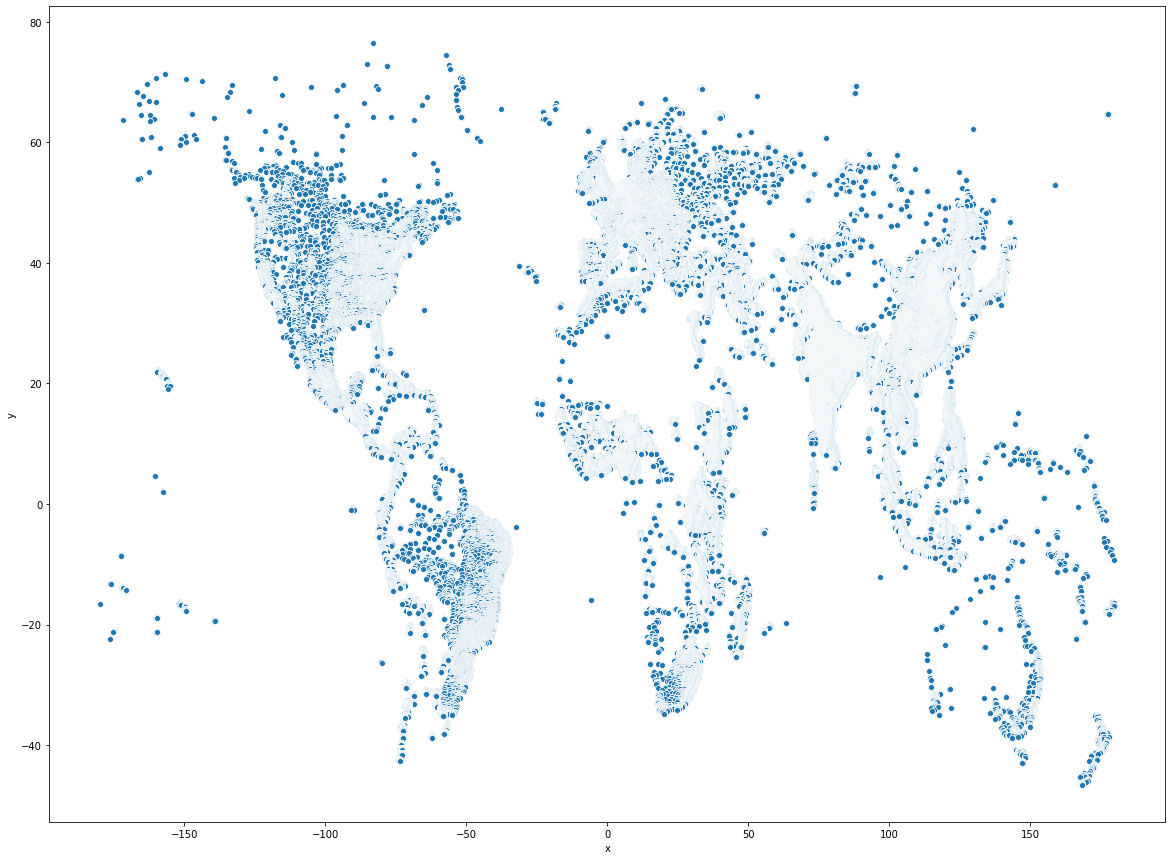

In [ ]:
#scatterplot to visualize our geospatial data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,15))
sns.scatterplot(density['x'], density['y'])

### Density Raster File 

In [8]:
# this is not working here in Colab. 
# density_rst = gpd.read_file('/content/drive/My Drive/Omdena/Official folder for Trashout/Task_1/T1_Datasets/Population/gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_2pt5_min.tif')

## Natural Earth Cities

In [ ]:
#gdf = GeoDataFrame(world_filtered, geometry=geometry) 
cities = gpd.read_file('/content/drive/My Drive/Omdena/Official folder for Trashout/Task_1/T1_Datasets/Cities/ne_10m_populated_places/ne_10m_populated_places_simple.shp')
print(cities.head())

   scalerank  natscale  ...       ne_id                     geometry
0         10         1  ...  1159112629  POINT (-57.84000 -34.48000)
1         10         1  ...  1159112647  POINT (-56.90100 -33.54400)
2         10         1  ...  1159112663  POINT (-58.30400 -33.13900)
3         10         1  ...  1159112679  POINT (-56.28400 -34.53800)
4         10         1  ...  1159112703  POINT (-56.21500 -34.09900)

[5 rows x 39 columns]


   scalerank  natscale  ...  rank_min                     geometry
0         10         1  ...         7  POINT (-57.84000 -34.48000)
1         10         1  ...         7  POINT (-56.90100 -33.54400)
2         10         1  ...         7  POINT (-58.30400 -33.13900)
3         10         1  ...         6  POINT (-56.28400 -34.53800)
4         10         1  ...         7  POINT (-56.21500 -34.09900)

[5 rows x 15 columns]
scalerank
natscale
labelrank
featurecla
name
adm0name
adm1name
latitude
longitude
pop_max
pop_min
pop_other
rank_max
rank_min
geometry
(7343, 15)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7343 entries, 0 to 7342
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   7343 non-null   int64   
 1   natscale    7343 non-null   int64   
 2   labelrank   7343 non-null   int64   
 3   featurecla  7343 non-null   object  
 4   name        7343 non-null   object  
 5   adm0name    734

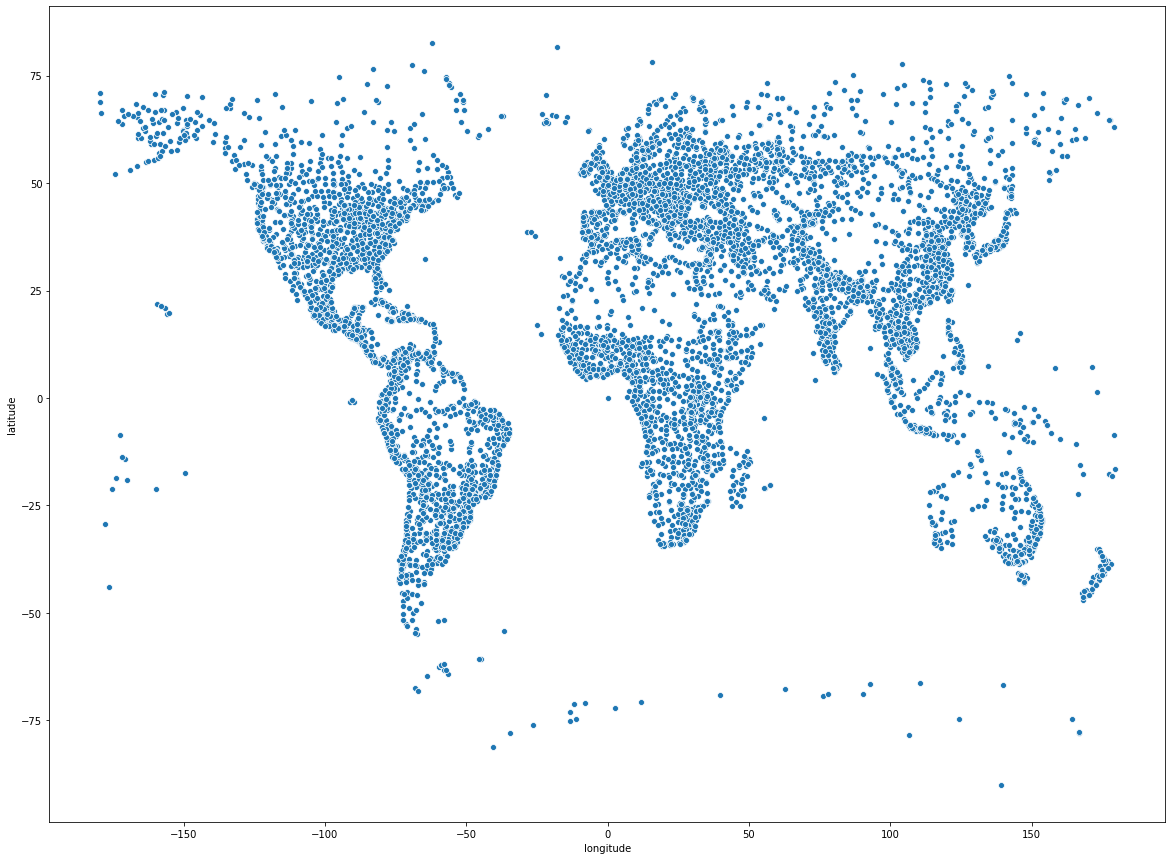

In [ ]:
#[print(col) for col in cities.columns]
# select only fields (columns) that not relevant 
columns = ['scalerank', 'natscale', 'labelrank', 'featurecla', 'name', 'adm0name', 'adm1name', 'latitude', 'longitude', 'pop_max', 'pop_min', 'pop_other', 'rank_max', 'rank_min', 'geometry']
cities = cities[columns]

print(cities.head())
[print(col) for col in cities.columns]

# this is just to check that "longitude" and "latitude" are uploaded correctly as floats (without miss-alignments between data records...)
#geometry = [Point(xy) for xy in zip(cities['longitude'], cities['latitude'])]
#print(geometry)

print(cities.shape)
cities.info()

plt.figure(figsize = (20,15))
sns.scatterplot(cities['longitude'], cities['latitude'])

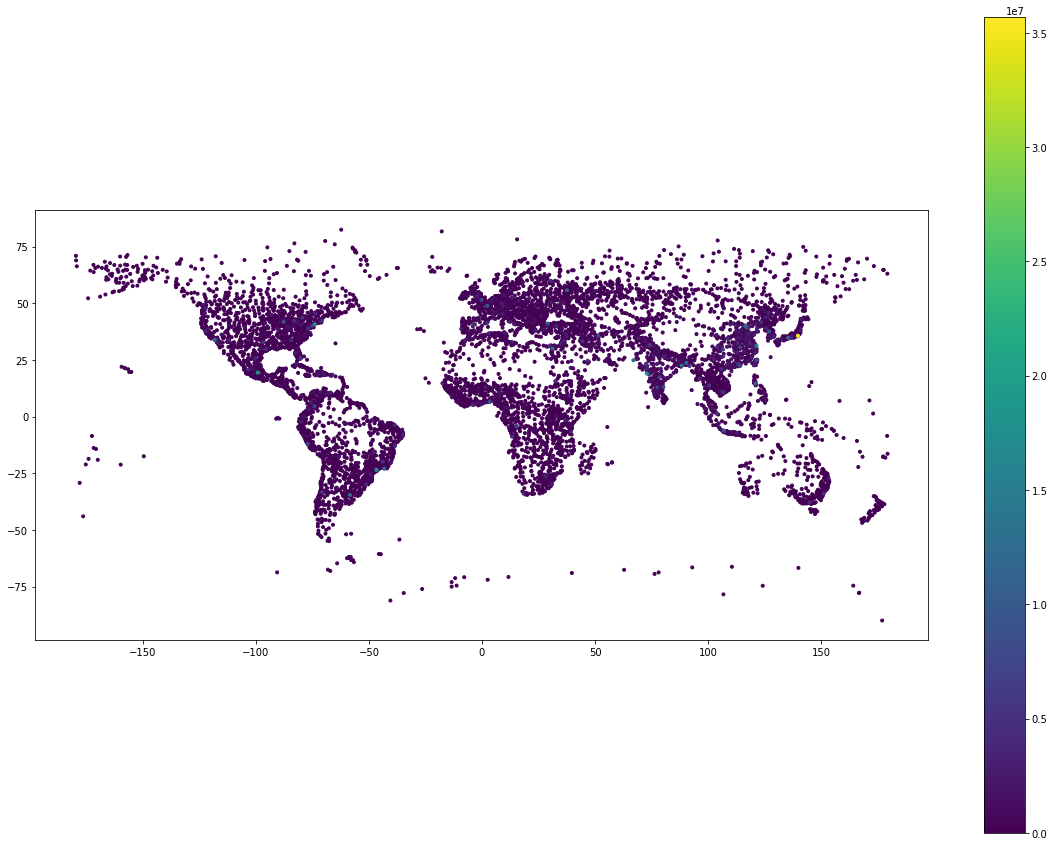

In [ ]:
# or plot using gpd.plot()
cities.plot(column='pop_max', marker = '.', cmap=None, legend=True, figsize=(20, 15))

Plot with basemap 

Text(0.5, 1.0, 'Natural Earth data - Cities on top of basemap')

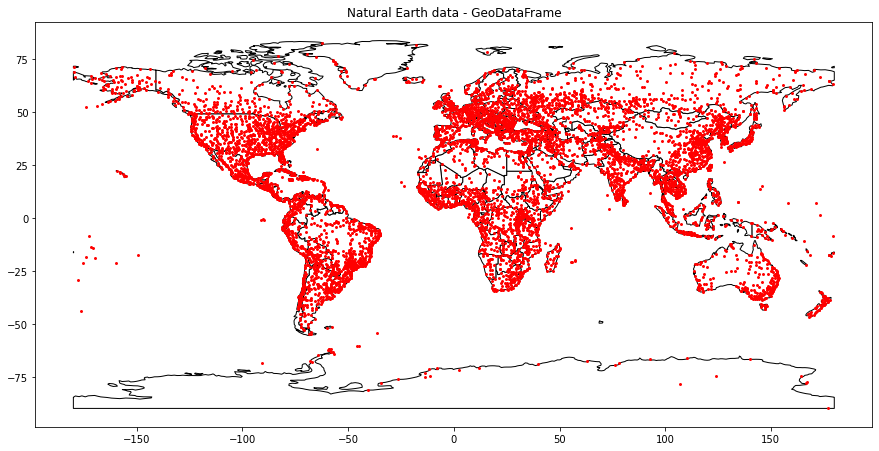

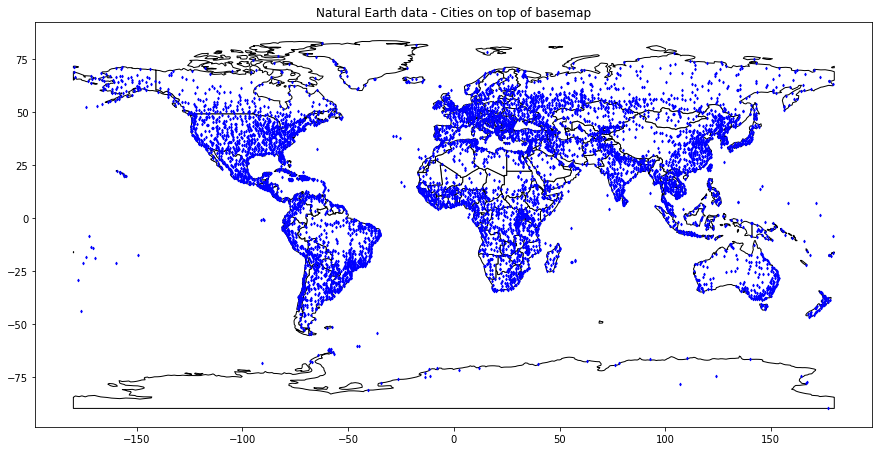

In [ ]:
# plot with the world base --> https://geopandas.org/mapping.html
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# 1) Plot with GeoDataFrame
gdf = GeoDataFrame(cities, geometry=cities['geometry']) 
gdf.plot(ax=world.plot(color='white', edgecolor='black', figsize=(15, 10)), marker='.', color='red', markersize=15)
plt.title('Natural Earth data - GeoDataFrame')

# 2) Plot directly cities on top of the basemap
cities.plot(ax=world.plot(color='white', edgecolor='black', figsize=(15, 10)), marker='d', color='blue', markersize=3)
plt.title('Natural Earth data - Cities on top of basemap')


## World Cities


(2540, 14)


Text(0.5, 1.0, 'World Cities')

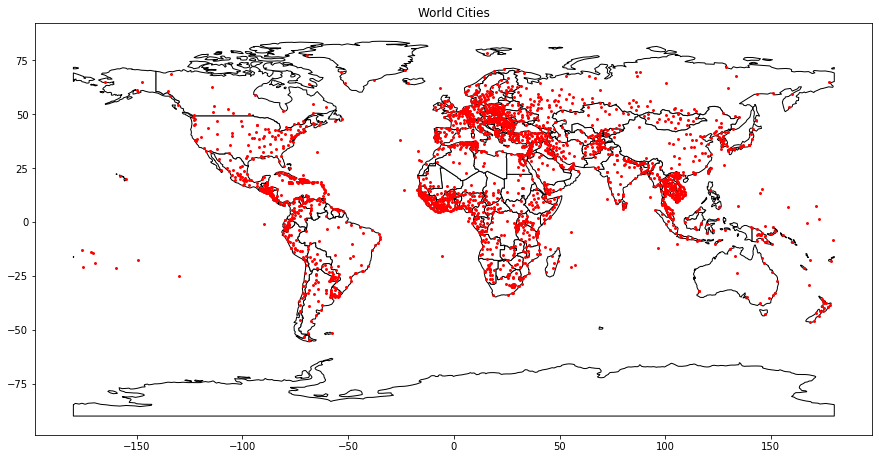

In [ ]:
world_cities = gpd.read_file('/content/drive/My Drive/Omdena/Official folder for Trashout/Task_1/T1_Datasets/Cities/World_Cities/World_Cities.shp')
print(world_cities.shape)
world_cities.head()

# Now plotting
gdf_wc = GeoDataFrame(world_cities, geometry=world_cities['geometry']) 
# add basemap to the cities
gdf_wc.plot(ax=world.plot(color='white', edgecolor='black', figsize=(15, 10)), marker='.', color='red', markersize=15)
plt.title('World Cities')